##HW_4_ASSIGNMENT 3:Goodness of  fit on CitiBike data

###Author Anita Ahmed - ama908@nyu.edu

In [15]:
#importing packages
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
import json
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Generating 1yr citibike data from October 2014 to Septermber 2015
File={}
File['Oct']=["https://s3.amazonaws.com/tripdata/201410-citibike-tripdata.zip",
                 "201410-citibike-tripdata.csv"]
File['Nov']=["https://s3.amazonaws.com/tripdata/201411-citibike-tripdata.zip",
                 "201411-citibike-tripdata.csv"]
File['Dec']=["https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip",
                 "201412-citibike-tripdata.csv"]
File['Jan']=["https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip",
                 "201501-citibike-tripdata.csv"]
File['Feb']=["https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip",
                 "201502-citibike-tripdata.csv"]
File['Mar']=["https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip",
                 "201503-citibike-tripdata.csv"]
File['Apr']=["https://s3.amazonaws.com/tripdata/201504-citibike-tripdata.zip",
                 "201504-citibike-tripdata.csv"]
File['May']=["https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip",
                 "201505-citibike-tripdata.csv"]
File['Jun']=["https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip",
                 "201506-citibike-tripdata.csv"]
File['Jul']=["https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip",
                 "201507-citibike-tripdata.csv"]
File['Aug']=["https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip",
                 "201508-citibike-tripdata.csv"]
File['Sep']=["https://s3.amazonaws.com/tripdata/201509-citibike-tripdata.zip",
                 "201509-citibike-tripdata.csv"]

In [16]:
#reading the zip file from all the months by generating a loop
df_store = {}
for n in File.keys():
    name ="%s" %n 
    r = urllib2.urlopen(File[n][0]).read()
    file = ZipFile(StringIO(r))
    citibike = file.open(File[n][1])
    df_store[name] = pd.read_csv(citibike)

print df_store[name].columns
print df_store.keys()

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')
['Mar', 'Feb', 'Aug', 'Sep', 'Apr', 'Jun', 'Jul', 'Jan', 'May', 'Nov', 'Dec', 'Oct']


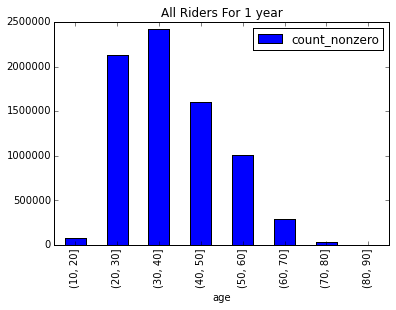

In [6]:
#Adding all Spring Summer Rider Data
ss_rider = [df_store['Mar'],df_store['Apr'],df_store['May'],df_store['Jun'],df_store['Jul'],df_store['Aug']]

df_SS = pd.concat(ss_rider, ignore_index=True)

#Adding all Fall Winter Rider Data
fw_rider = [df_store['Sep'],df_store['Oct'],df_store['Nov'],df_store['Dec'],df_store['Jan'],df_store['Feb']]

df_FW = pd.concat(fw_rider, ignore_index=True)

#Adding 1 year Rider Data
all_rider= pd.concat([df_SS, df_FW], ignore_index=True)

#Getting the age of all scubcribers for 1 year
all_rider['age'] = 2015-all_rider['birth year'][(all_rider['usertype'] == 'Subscriber')]
all_rider['age'] = all_rider['age'][~np.isnan(all_rider['age'])]

#generating Histograms of all riders age distribution. 
bins = np.arange(10, 99, 10)
all_rider.age.groupby(pd.cut(all_rider.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders For 1 year")
all_rider_age_dist = all_rider.age.groupby(pd.cut(all_rider.age, bins)).agg([count_nonzero])

### Performing AD Test Goodness of Fit 

####Null Hypothesis: The generated age distribution A(x) follows the normal distribution N(x)
Ho: A(x)follows N(x)
####Alternate Hypothesis: The generated distribution G(x) does not follows the normal distribution F(x)
Ha: G(x) does not follow F(x)

We are performing the test at a Critical value of .984 at .01 signifinace level.

In [25]:
ad_all_rider = scipy.stats.anderson(all_rider_age_dist ['count_nonzero'],'norm')
print "All riders on normal", ad_all_rider

All riders on normal (0.49673215770813606, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Analysis:
As observed for the age distribution on normal AD test the AD statistic is lower than the thershold value of 0.984 at a significance level of .01 , therefore we accept the null hypothesis that the generated age distribution for all citi bike riders follows the given normal distribution.


In [26]:
ksAll=scipy.stats.kstest(all_rider_age_dist ['count_nonzero'],'norm')
print "All, normal fit", ksAll

#compare to poisson 

ksAll_cauchy=scipy.stats.kstest(all_rider_age_dist ['count_nonzero'], 'cauchy')
print "All, normal fit", ksAll_cauchy

All, normal fit (1.0, 0.0)
All, normal fit (0.99973228779551615, 0.0)


Analysis:
As observed for the age distribution on normal/cauchy KS test the P-value is zero, therefore we reject the null hypothesis that the generated age distribution for all citi bike riders follows the given normal/cauchy distribution.

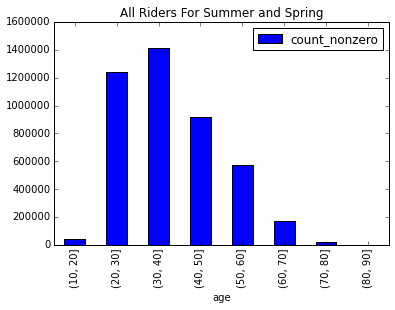

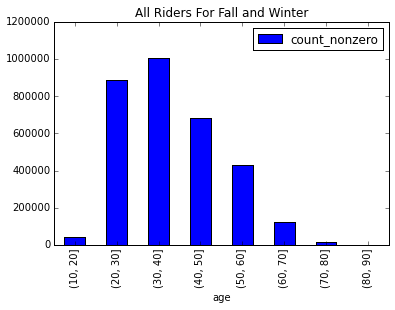

In [14]:
df_SS['age'] = 2015-df_SS['birth year'][(df_SS['usertype'] == 'Subscriber')]
df_SS['age'] = df_SS['age'][~np.isnan(df_SS['age'])]

df_FW['age'] = 2015-df_FW['birth year'][(df_FW['usertype'] == 'Subscriber')]
df_FW['age'] = df_FW['age'][~np.isnan(df_FW['age'])]

df_SS.age.groupby(pd.cut(df_SS.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders For Summer and Spring")
df_SS_age_dist = df_SS.age.groupby(pd.cut(df_SS.age, bins)).agg([count_nonzero])

df_FW.age.groupby(pd.cut(df_FW.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders For Fall and Winter")
df_FW_age_dist = df_FW.age.groupby(pd.cut(df_FW.age, bins)).agg([count_nonzero])

In [27]:
Spring_Summer_Rider = scipy.stats.anderson(df_SS_age_dist ['count_nonzero'],'norm')
print "All riders on normal", Spring_Summer_Rider

All riders on normal (0.49920908468307346, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Analysis:
As observed for the age distribution on normal AD test the AD statistic is lower than the thershold value of 0.984 at a significance level of .01 , therefore we accept the null hypothesis that the generated age distribution for all citi bike riders follows the given normal distribution.

In [28]:
Fall_Winter_Rider = scipy.stats.anderson(df_FW_age_dist ['count_nonzero'],'norm')
print "All riders on normal", Fall_Winter_Rider

All riders on normal (0.49462583218514489, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Analysis: As observed for the age distribution on normal AD test the AD statistic is lower than the thershold value of 0.984 at a significance level of .01 , therefore we accept the null hypothesis that the generated age distribution for all citi bike riders follows the given normal distribution.

In [29]:
ksAll_SS=scipy.stats.kstest(df_SS_age_dist  ['count_nonzero'],'norm')
print "All, normal fit", ksAll_SS

#compare to poisson 

ksAll_SS_cauchy=scipy.stats.kstest(df_SS_age_dist  ['count_nonzero'], 'cauchy')
print "All, normal fit", ksAll_SS_cauchy

All, normal fit (1.0, 0.0)
All, normal fit (0.99945024253940273, 0.0)


Analysis: As observed for the age distribution on normal/cauchy KS test the P-value is zero, therefore we reject the null hypothesis that the generated age distribution for all citi bike riders follows the given normal/cauchy distribution.

In [31]:
ksAll_FW=scipy.stats.kstest(df_FW_age_dist  ['count_nonzero'],'norm')
print "All, normal fit", ksAll_FW

#compare to poisson 

ksAll_FW_cauchy=scipy.stats.kstest(df_FW_age_dist  ['count_nonzero'], 'cauchy')
print "All, normal fit", ksAll_FW_cauchy

 All, normal fit (1.0, 0.0)
All, normal fit (0.99947818098190655, 0.0)


Analysis: As observed for the age distribution on normal/cauchy KS test the P-value is zero, therefore we reject the null hypothesis that the generated age distribution for all citi bike riders follows the given normal/cauchy distribution.